<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/think-stats/01_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [1]:
import numpy as np
from os.path import basename, exists

In [2]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

Downloaded thinkstats2.py
Downloaded thinkplot.py
Downloaded nsfg.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [4]:
from collections import Counter

import thinkstats2
import thinkplot
import nsfg

##Distributions

Given a list of values, there are several ways to count the frequency of each value.

In [5]:
t = [1, 2, 3, 4, 5]

You can use a Python dictionary.

In [6]:
hist = {}
for x in t:
  hist[x] = hist.get(x, 0) + 1
hist

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1}

You can use a Counter (which is a dictionary with additional methods):

In [7]:
counter = Counter(t)
counter

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1})

##Representing Histograms

In [8]:
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [9]:
hist.Freq(2)

2

In [10]:
hist[2]

2

In [11]:
hist[4]

0

In [12]:
hist.Values()

dict_keys([1, 2, 3, 5])

In [13]:
for val in sorted(hist.Values()):
  print(val, hist[val])

1 1
2 2
3 1
5 1


In [14]:
for val, freq in hist.Items():
  print(val, freq)

1 1
2 2
3 1
5 1


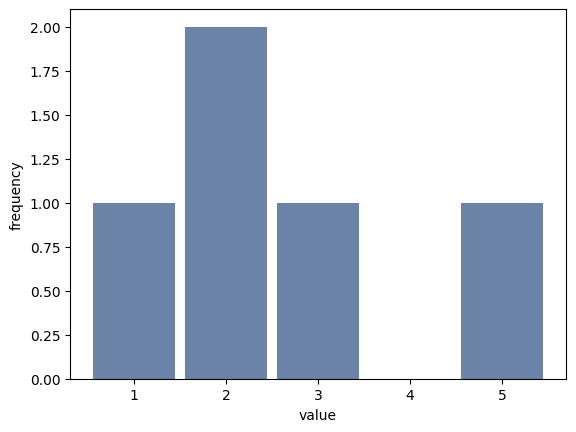

In [15]:
# let's plot histogram
thinkplot.Hist(hist)
thinkplot.Config(xlabel="value", ylabel="frequency")

##Dataset

In [16]:
# let's start by reading the data and selecting records for live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

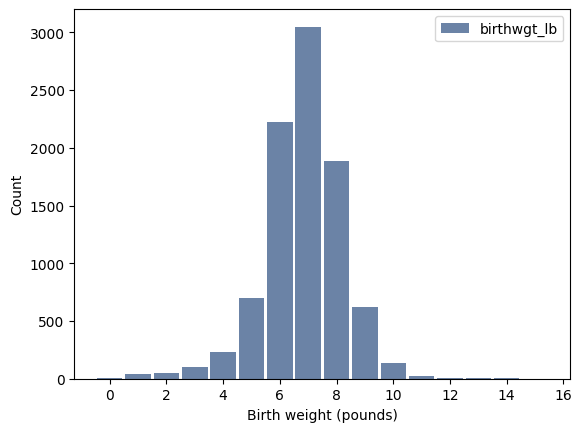

In [17]:
# let's generate and plot the histogram of birthwgt_lb for live births
hist = thinkstats2.Hist(live.birthwgt_lb, label="birthwgt_lb")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="Count")

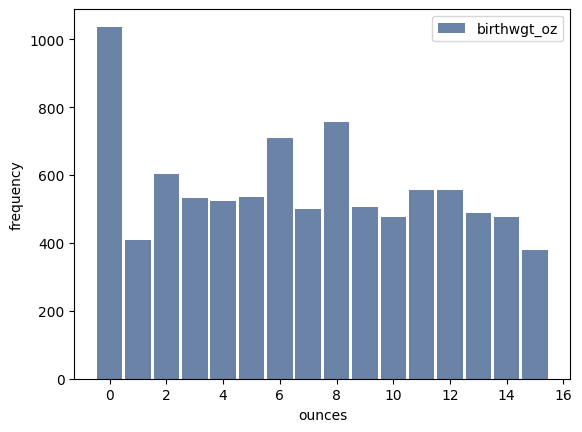

In [18]:
# let's plot the histogram of pregnancy lengths (column prglngth).
hist = thinkstats2.Hist(live.birthwgt_oz, label="birthwgt_oz")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="ounces", ylabel="frequency")

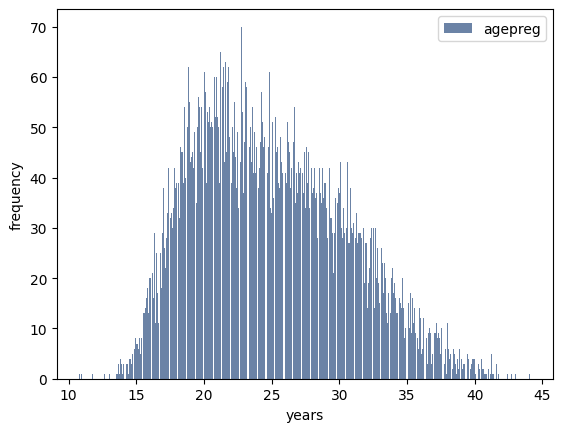

In [21]:
# let's plot the histogram of mother’s age at end of pregnancy
hist = thinkstats2.Hist(live.agepreg, label="agepreg")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="years", ylabel="frequency")

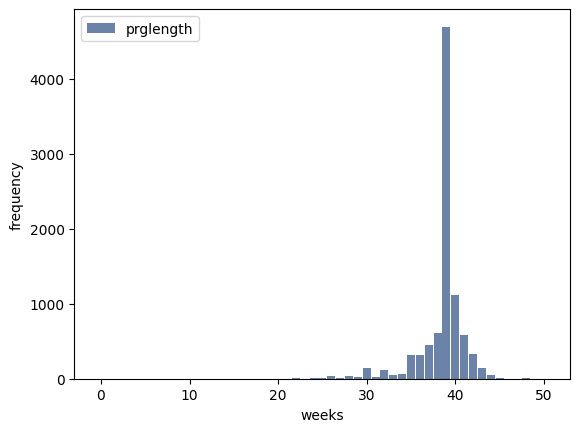

In [23]:
# let's plot the histogram of pregnancy length in weeks
hist = thinkstats2.Hist(live.prglngth, label="prglength")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="weeks", ylabel="frequency")

##Outliers